# Laboratorio #2 – Detección de SPAM
### Jose Hernandez 20053
### Javier Mombiela 20067

In [64]:
# importando librerias
import re
import nltk
import numpy as np
import contractions
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, auc

## Parte 1 – Ingeniería de características 
### 1.1 - Exploración de datos y Pre-procesamiento

In [65]:
# Cargando datos y eliminando columnas vacias
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data.iloc[:, :2]

data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Aplicando tecnicas de pre-procesamiento de lenguaje natural

In [66]:
# Convertir texto a minúsculas en la columna 'v2'
data['v2'] = data['v2'].str.lower()

data.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [67]:
# Expandir contracciones
print("Original  : ", data['v2'].iloc[4])
data['v2'] = data['v2'].apply(lambda x: contractions.fix(x))

# data.head()
print("Modificado: ", data['v2'].iloc[4])

Original  :  nah i don't think he goes to usf, he lives around here though
Modificado:  nah i do not think he goes to usf, he lives around here though


In [68]:
# Remover caracteres especiales, números y símbolos
print("Original  : ", data['v2'].iloc[12])
data['v2'] = data['v2'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

print("Modificado: ", data['v2'].iloc[12])

Original  :  urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18
Modificado:  urgent you have won a  week free membership in our  prize jackpot txt the word claim to no  tc wwwdbuknet lccltd pobox ldnwarw


In [69]:
# Eliminando stopwords
nltk.download('stopwords')
print("Original  : ", data['v2'].iloc[77])

stop_words = set(stopwords.words('english'))
data['v2'] = data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print("Modificado: ", data['v2'].iloc[77])

Original  :  i like you peoples very much but am very shy pa
Modificado:  like peoples much shy pa


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rjmom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# Stemming
porter_stemmer = PorterStemmer()
print("Original  : ", data['v2'].iloc[13])

def stem_text(text):
    return ' '.join([porter_stemmer.stem(word) for word in text.split()])

data['v2'] = data['v2'].apply(stem_text)
    
print("Modificado: ", data['v2'].iloc[13])

Original  :  searching right words thank breather promise take help granted fulfil promise wonderful blessing times
Modificado:  search right word thank breather promis take help grant fulfil promis wonder bless time


### 1.2 Representación de texto

In [71]:
# Obtener los mensajes preprocesados en una lista
mensajes = data['v2'].tolist()
mensajes

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over',
 'dun say earli hor c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back would like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month r entitl updat latest colour mobil camera free call mobil updat co free',
 'go home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim tc wwwdbuknet lccltd pobox ldnwarw',
 'search right word thank breather pr

In [72]:
# Bag of Words (BoW) para n = 1
bow1 = CountVectorizer(ngram_range=(1,1))
bow1_matrix = bow1.fit_transform(mensajes)
bow1_matrix = bow1_matrix.toarray()
vocab1 = bow1.get_feature_names_out()
pd.DataFrame(bow1_matrix, columns=vocab1)

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Bag of Words (BoW) para n = 2
bow2 = CountVectorizer(ngram_range=(2,2))
bow2_matrix = bow2.fit_transform(mensajes)
bow2_matrix = bow2_matrix.toarray()
vocab2 = bow2.get_feature_names_out()
pd.DataFrame(bow2_matrix, columns=vocab2)

,aa exhaust,aah bless,aah cuddl,aah speak,aaniy pudunga,aaooooright work,aathilov lot,aathiwher dear,ab sara,abbey happi,...,zf pmessag,zhong se,zindgi wo,zoe hit,zoe join,zogtoriu ive,zoom cine,zouk nichol,zs subscript,zyada kisi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# TF-IDF
tv = TfidfVectorizer()
tv_matrix = tv.fit_transform(mensajes)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names_out()
pd.DataFrame(tv_matrix, columns=vocab)

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2 – Implementación del modelo
### 2.1 Separación de datos

In [75]:
# Dividir los datos en entrenamiento y prueba
X = data['v2']
y = data['v1']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% de entrenamiento, 30% de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar la cantidad de ejemplos en cada conjunto
print("Número de ejemplos de entrenamiento:", len(X_train))
print("Número de ejemplos de prueba:", len(X_test))

Número de ejemplos de entrenamiento: 3900
Número de ejemplos de prueba: 1672


In [76]:
# Representación Bow (n=1) para el conjunto de entrenamiento
X_train_bow1 = bow1.fit_transform(X_train)

# Representación Bow (n=1) para el conjunto de prueba
X_test_bow1 = bow1.transform(X_test)

# Representación Bow (n=2) para el conjunto de entrenamiento
X_train_bow2 = bow2.fit_transform(X_train)

# Representación Bow (n=2) para el conjunto de prueba
X_test_bow2 = bow2.transform(X_test)

# Representación TF-IDF para el conjunto de entrenamiento
X_train_tv = tv.fit_transform(X_train)

# Representación TF-IDF para el conjunto de prueba
X_test_tv = tv.transform(X_test)

### 2.2 Implementación

In [77]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalizar'

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalizar la matriz de confusión si se solicita
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()
    plt.show()

def plot_ROC(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

In [78]:
# Definir una función para entrenar y evaluar el modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test, representation):
    # Crear el clasificador Random Forest
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Entrenar el modelo
    classifier.fit(X_train, y_train)

    # Predecir las etiquetas de clase en el conjunto de prueba
    y_pred = classifier.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Calcular precision y recall
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')

    # Calcular la puntuación AUC y la curva ROC
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Convertir las etiquetas a valores binarios
    lb = LabelBinarizer()
    y_test_binary = lb.fit_transform(y_test)

    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
    auc = roc_auc_score(y_test_binary, y_prob)

    # Imprimir las métricas
    print(f"Matriz de confusión ({representation}):")
    print(cm)
    print(f"Precisión ({representation}): {precision:.2f}")
    print(f"Recall ({representation}): {recall:.2f}")
    print(f"AUC ({representation}): {auc:.2f}")

    # Llamar a las funciones plot_confusion_matrix y plot_ROC
    plot_confusion_matrix(y_test, y_pred, classes=["ham", "spam"], normalize=True, title=f"Matriz de confusión ({representation})")
    plot_ROC(y_test_binary, y_prob)

Matriz de confusión (Bag of Words (n=1)):
[[1453    0]
 [  45  174]]
Precisión (Bag of Words (n=1)): 1.00
Recall (Bag of Words (n=1)): 0.79
AUC (Bag of Words (n=1)): 0.98


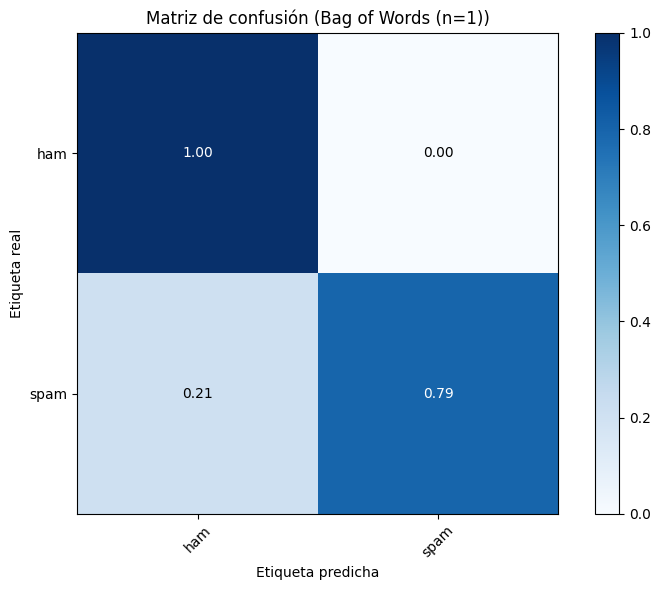

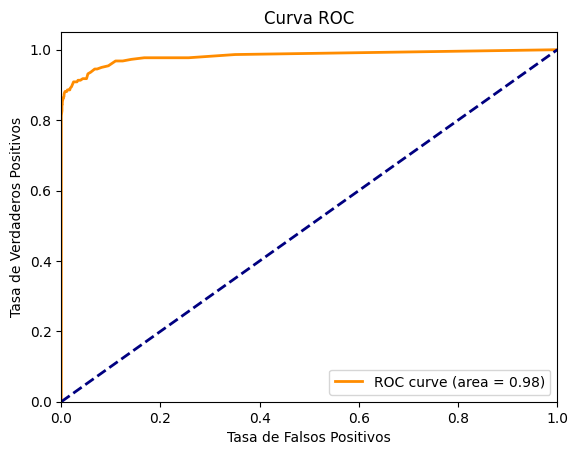

In [79]:
train_and_evaluate_model(X_train_bow1, y_train, X_test_bow1, y_test, "Bag of Words (n=1)")

Matriz de confusión (Bag of Words (n=2)):
[[1451    2]
 [  72  147]]
Precisión (Bag of Words (n=2)): 0.99
Recall (Bag of Words (n=2)): 0.67
AUC (Bag of Words (n=2)): 0.95


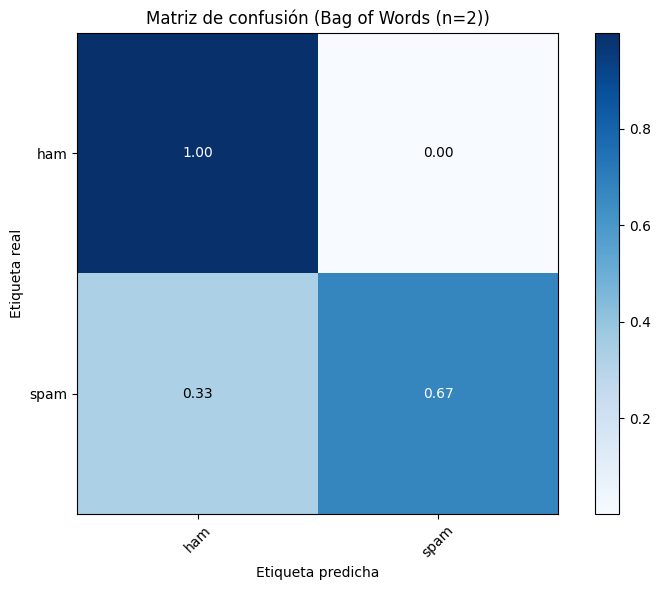

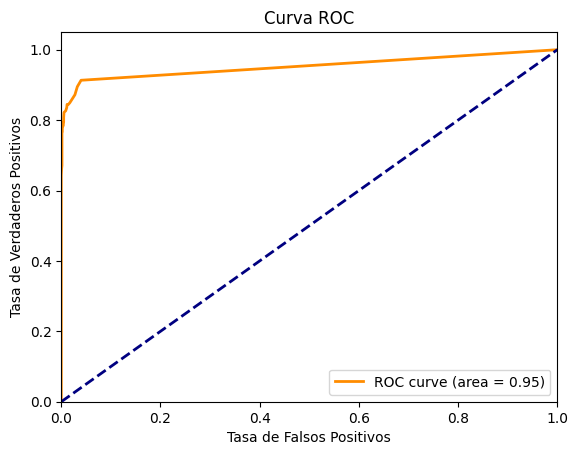

In [80]:
train_and_evaluate_model(X_train_bow2, y_train, X_test_bow2, y_test, "Bag of Words (n=2)")

Matriz de confusión (TF-IDF):
[[1453    0]
 [  41  178]]
Precisión (TF-IDF): 1.00
Recall (TF-IDF): 0.81
AUC (TF-IDF): 0.98


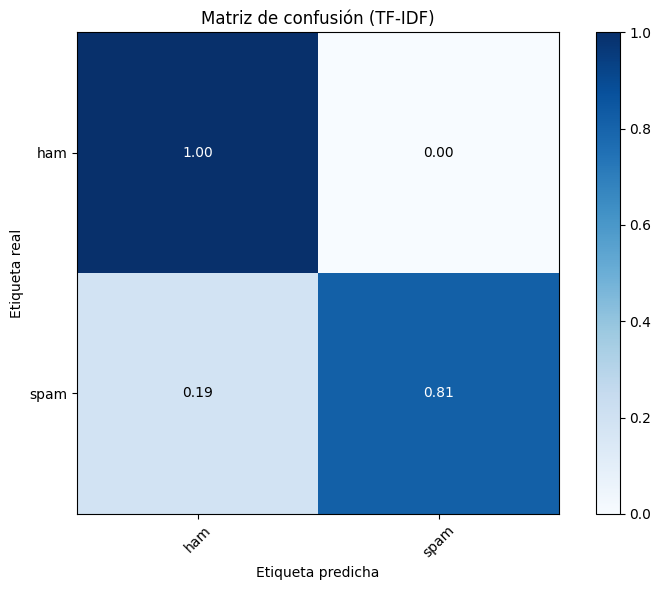

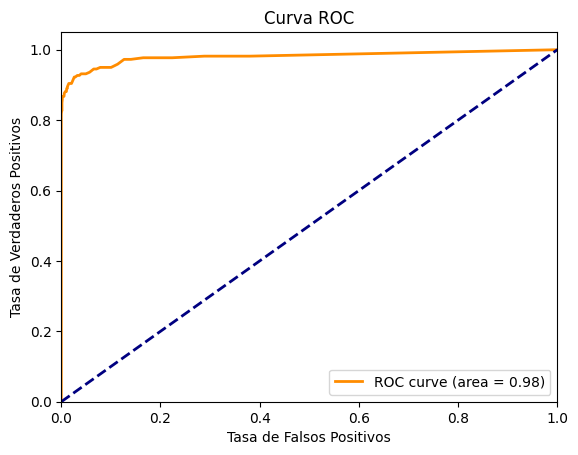

In [81]:
train_and_evaluate_model(X_train_tv, y_train, X_test_tv, y_test, "TF-IDF")

### 2.3 Discusión

**1. ¿Qué error es más “aceptable”: dejar pasar un SMS de SPAM (falso negativo) o bloquear un SMS legítimo (falso positivo)? Justifique su respuesta.**

**2. Compare los valores para cada modelo de representación numérico. En base a la respuesta de la primera pregunta ¿Qué modelo de representación numérica produjo el mejor resultado, BoG o TF-IDF? ¿Cuál o cuáles son las razones por las que dicho modelo se comportó de mejor manera?**

**3. En base a la exploración de datos e ingeniería de características que realizó en el primer y este laboratorio, ¿qué consejos le daría a un familiar que le solicita ayuda para detectar si un email o SMS es phishing o no? ¿En qué características de una URL/email podría fijarse su familiar para ayudarlo a detectar un potencial phishing?**

**4. Si detectamos una URL o email/SMS de phishing, ¿qué podemos hacer para detener su distribución?**